In [103]:
import pandas as pd
import numpy as np

data = pd.read_csv("./sample_submission.csv")
data.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [104]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [167]:
print train.shape
print test.shape

(1460, 83)
(1459, 82)


In [168]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,enc_street,enc_condition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,1,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,1,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,1,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,1,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,1,0


In [169]:
#goal is to predict the final sale price of the homes. The SalePrice column is the target variable

train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [170]:
import matplotlib.pyplot as plt

plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [171]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

1.88287575977


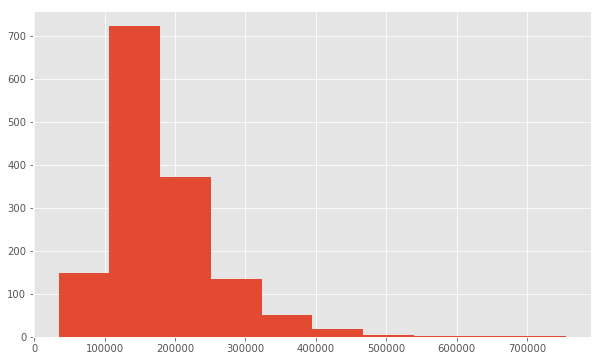

In [173]:
#The saleprice data is positively skewed. Therefore we need to transform the data to make it normal

print train.SalePrice.skew()
plt.hist(train.SalePrice)
plt.show()


0.121335062205


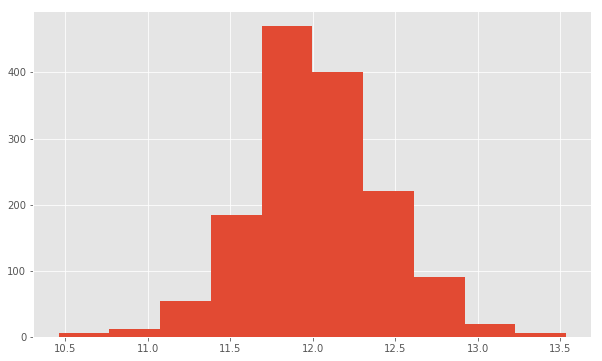

In [174]:
target = np.log(train.SalePrice)
print target.skew()
plt.hist(target)
plt.show()

In [176]:
#Distinguish number vs. values for the different columns

number_columns = train.select_dtypes(include=[np.number])
number_columns.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
enc_street         uint8
enc_condition      int64


In [177]:
#We are now testing the correlation between the columns and the target variable (Saleprice)

corr = number_columns.corr()

print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-10:])

(SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64, '\n')
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [178]:
#The highest correlation is the column OverallQual

train.OverallQual.describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

In [179]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [180]:
#Looking at the results above, OverallQual is a range from 1 to 10.

#Now look at the relationship of SalePrice and OverallQual

quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)

In [181]:
print quality_pivot

             SalePrice
OverallQual           
1                50150
2                60000
3                86250
4               108000
5               133000
6               160000
7               200141
8               269750
9               345000
10              432390


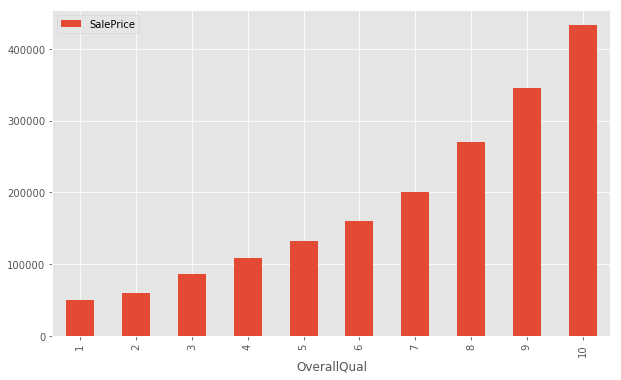

In [182]:
quality_pivot.plot(kind='bar')
plt.show()

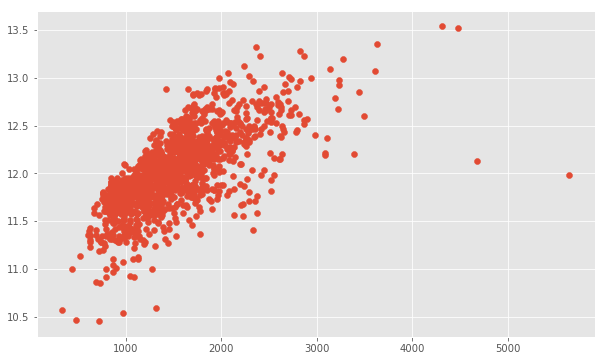

In [183]:
#We can see it is a direct relationship.

#Exploring the second highest correlation GrLivArea and SalePrice

plt.scatter(x=train['GrLivArea'], y=target)
plt.show()

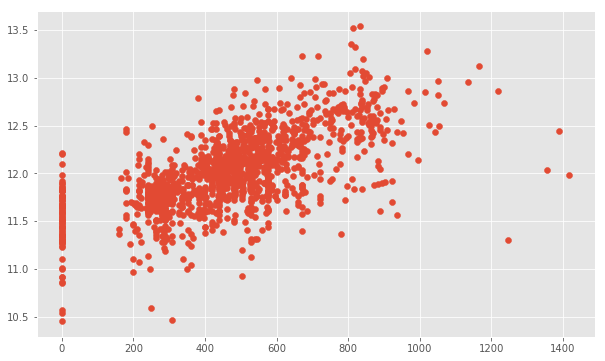

In [184]:
#Exploring the GarageArea and SalePrice

plt.scatter(x=train['GarageArea'], y=target)
plt.show()

In [185]:
#Now we need to remove Null or missing values from our data

nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageCond,81
GarageType,81


In [186]:
#The above makes sense as PoolQC is Nan when PoolArea is 0 or no pool. Same thing for Garage.

#Now checking data for unique values
print ("Unique values are:", train.MiscFeature.unique())


('Unique values are:', array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object))


In [187]:
#In addition to these unique values, the data set also has non-numeric features.

Non_Number = train.select_dtypes(exclude=[np.number])
Non_Number.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [189]:
#We need to transform this data. 

print train.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64


In [190]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [191]:
print train.enc_street.value_counts()

1    1454
0       6
Name: enc_street, dtype: int64


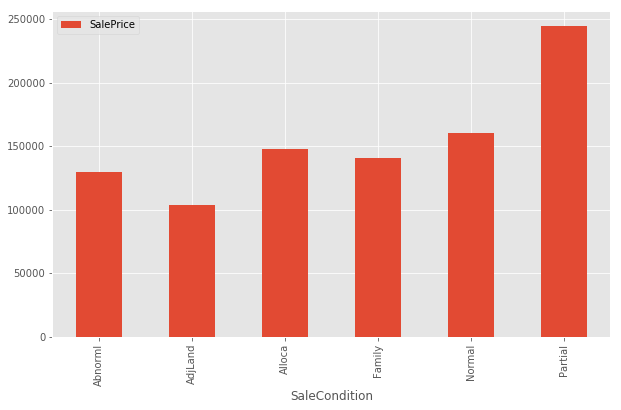

In [192]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar')
plt.show()

In [193]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

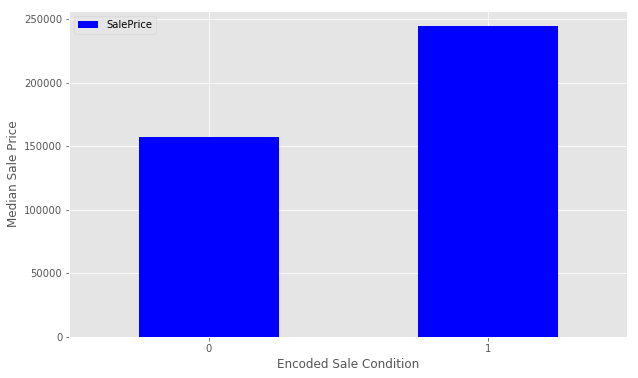

In [196]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [198]:
#Drop na data

data = train.select_dtypes(include=[np.number]).interpolate().dropna() 

In [203]:
#Check if the data has any missing data

sum(data.isnull().sum() != 0)

0

In [204]:
#Build a linear model

y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.50)

In [208]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [209]:
model = lr.fit(X_train, y_train)

In [210]:
print model.score(X_test, y_test)

0.856406460278


In [211]:
predictions = model.predict(X_test)

In [212]:
from sklearn.metrics import mean_squared_error
print mean_squared_error(y_test, predictions)

0.0239450946394


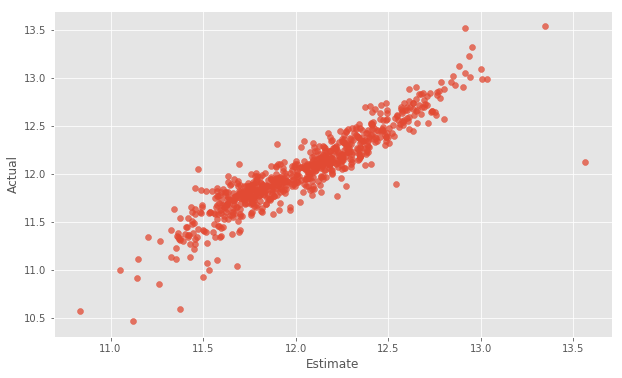

In [214]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75)
plt.xlabel('Estimate')
plt.ylabel('Actual')
plt.show()

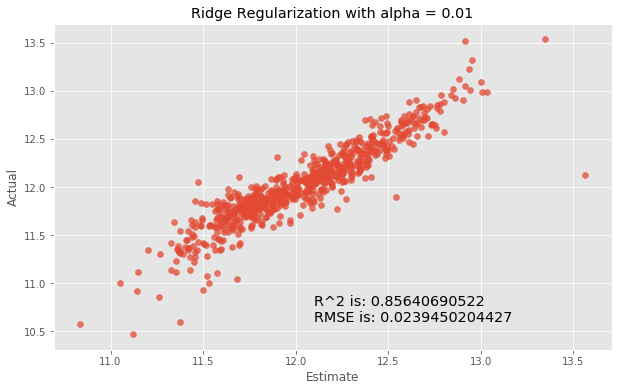

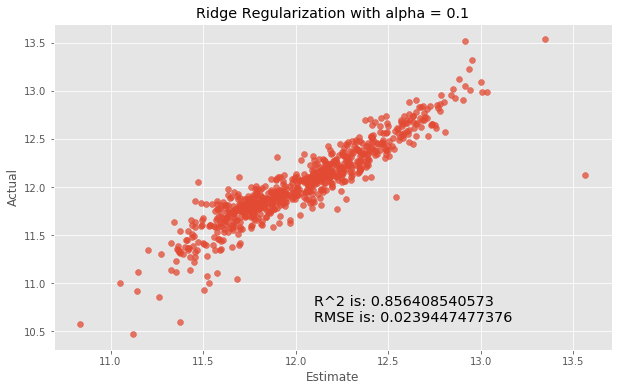

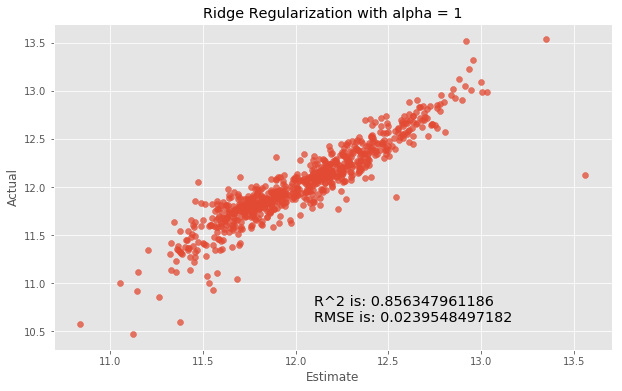

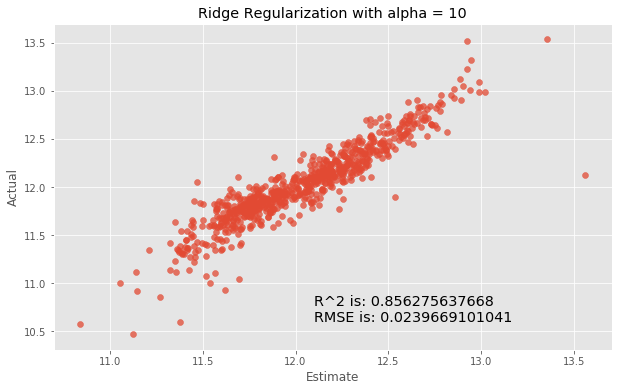

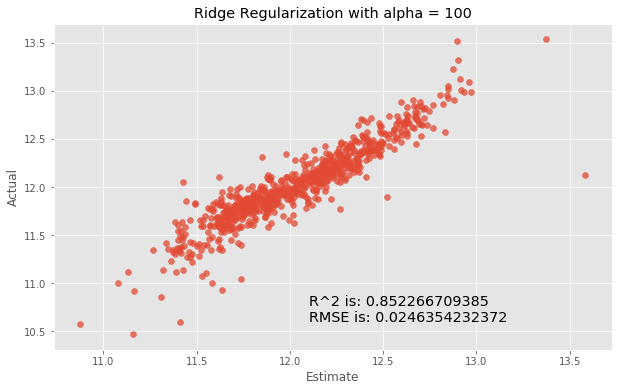

In [215]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75)
    plt.xlabel('Estimate')
    plt.ylabel('Actual')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [216]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [217]:
feats = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

In [218]:
predictions = model.predict(feats)

In [163]:
final_predictions = np.exp(predictions)

In [219]:
print ("Original estimates are", predictions[:10])
print ("Final estimate are", final_predictions[:10])

('Original estimates are', array([ 11.64895308,  11.94044415,  12.02718676,  12.16293269,
        12.09403452,  12.07047626,  12.1687319 ,  12.04426022,
        12.17618814,  11.67184269]))
('Final estimate are', array([ 119200.55374669,  122833.45845104,  168109.56584158,
        195206.40091533,  181094.63485685,  175896.68503205,
        197890.75319214,  171497.33275078,  197683.02506152,
        119274.80003768]))


In [220]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,119200.553747
1,1462,122833.458451
2,1463,168109.565842
3,1464,195206.400915
4,1465,181094.634857


In [222]:
submission.to_csv('final_project_answer.csv', index=False)